# Test 4 SOM on Kepler and TESS Data

The fourth test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out under-sampling to balance the dataset, eliminating some anomalous features and initializing the weights of the SOM with 50% composites from values ​​of Planets taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [3]:
X_train = X_train.drop(columns=['Unnamed: 0','Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
                                'Stellar log(g) (cm/s^2)', 'TESS Mag'])
y_train = y_train.drop(columns='Unnamed: 0')

In [4]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [5]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err']

In [6]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 13)
Shape of y_train: (10804, 1)


In [7]:
X_train = X_train.values
y_train = y_train.values

In [8]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  13


# Grid Search

In [9]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [1],
    'W_FALSE_PLANET': [1],
    'K': [7, 11]
}

In [10]:
# grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
# best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

# print("Best param:", best_param)
# print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 6,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x2b73046478b0>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b7304647940>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7662817551963048
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 30, 'num_cols': 30,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x7f7332056d40>,
# 'distance_nr': <function DistanceMetrics.euclidean_distance at 0x7f7332056d40>,
# 'W_PLANET': 1, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7612216566404443

In [11]:
best_param = {}
best_param['W'] = None
best_param['max_iter'] = 100000
best_param['num_rows'] = 20
best_param['num_cols'] = 20
best_param['max_learning_rate'] = 0.8
best_param['max_distance'] = 6
best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
best_param['distance_nr'] = DistanceMetrics.manhattan_distance
best_param['W_PLANET'] = 0.9
best_param['W_FALSE_PLANET'] = 1
best_param['K'] = 11

In [12]:
W = best_param['W']
max_iter = 100000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [13]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000001  | LR:    0.800000  | NR:    6.000000  | Time:    0.005776


Iteration:  01000  | QE:    0.000006  | LR:    0.792008  | NR:    6.000000  | Time:    4.138708
Iteration:  02000  | QE:    0.000013  | LR:    0.784008  | NR:    6.000000  | Time:    3.901720
Iteration:  03000  | QE:    0.000002  | LR:    0.776008  | NR:    6.000000  | Time:    3.236055
Iteration:  04000  | QE:    0.000002  | LR:    0.768008  | NR:    6.000000  | Time:    3.216028
Iteration:  05000  | QE:    0.000004  | LR:    0.760008  | NR:    6.000000  | Time:    3.497601
Iteration:  06000  | QE:    0.000004  | LR:    0.752008  | NR:    6.000000  | Time:    4.067183
Iteration:  07000  | QE:    0.000002  | LR:    0.744008  | NR:    6.000000  | Time:    4.559755
Iteration:  08000  | QE:    0.000001  | LR:    0.736008  | NR:    6.000000  | Time:    4.053593
Iteration:  09000  | QE:    0.000002  | LR:    0.728008  | NR:    6.000000  | Time:    3.966093
Iteration:  10000  | QE:    0.000036  | LR:    0.720008  | NR:    6.000000  | Time:    5.074739
Iteration:  11000  | QE:    0.000018  | 

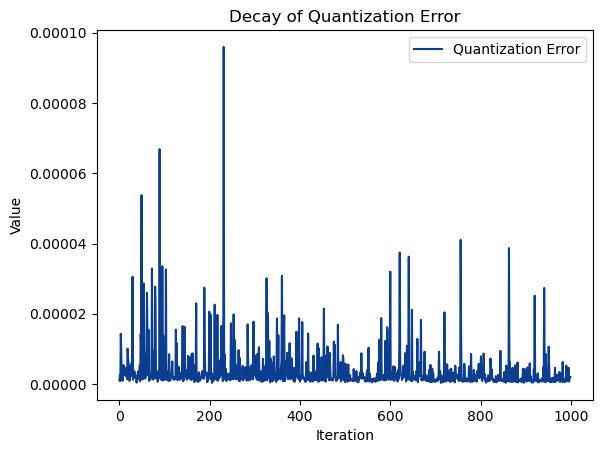

In [38]:
REDUCE = 100
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

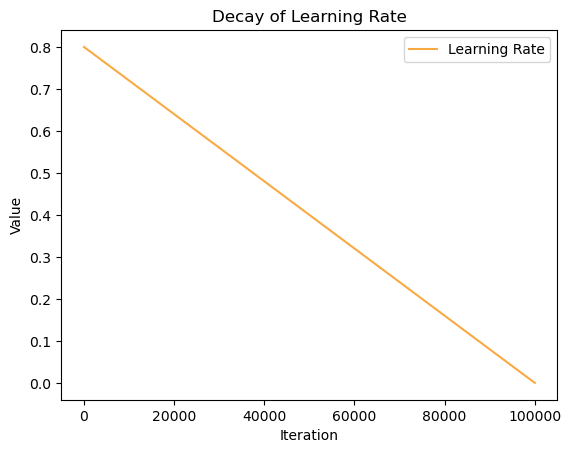

In [15]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

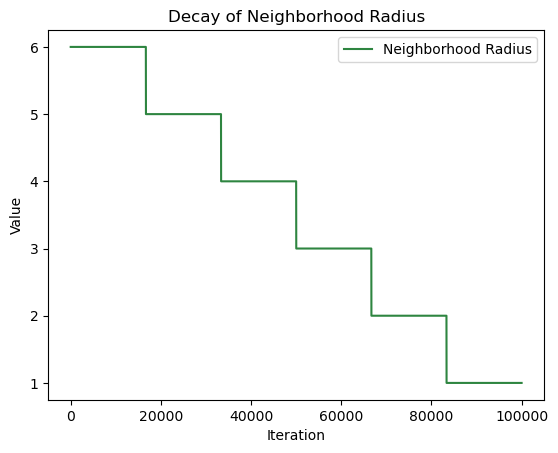

In [16]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

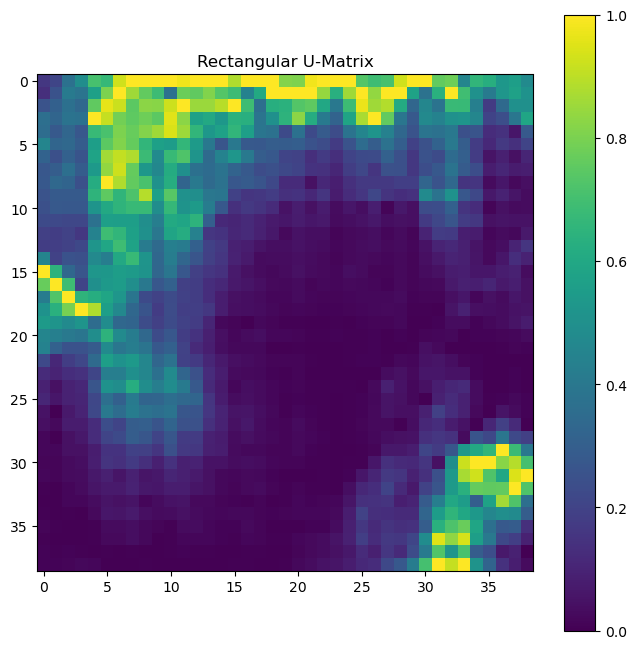

In [17]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

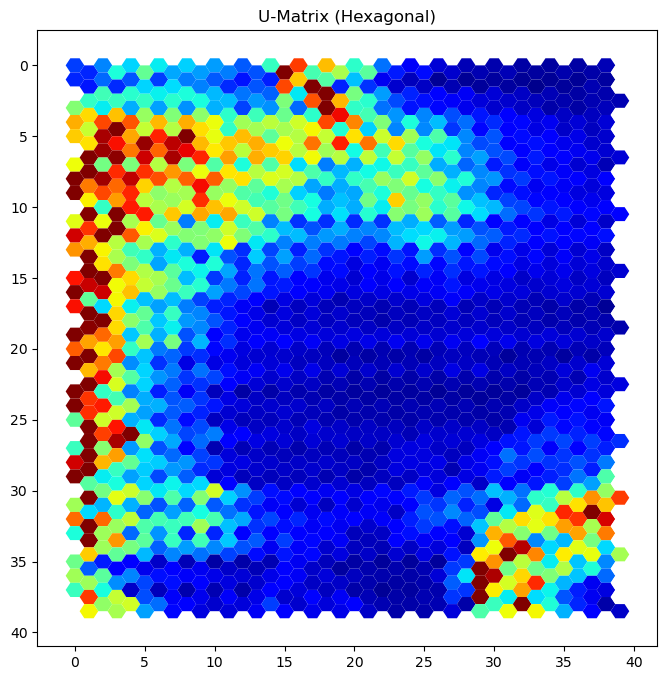

In [18]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

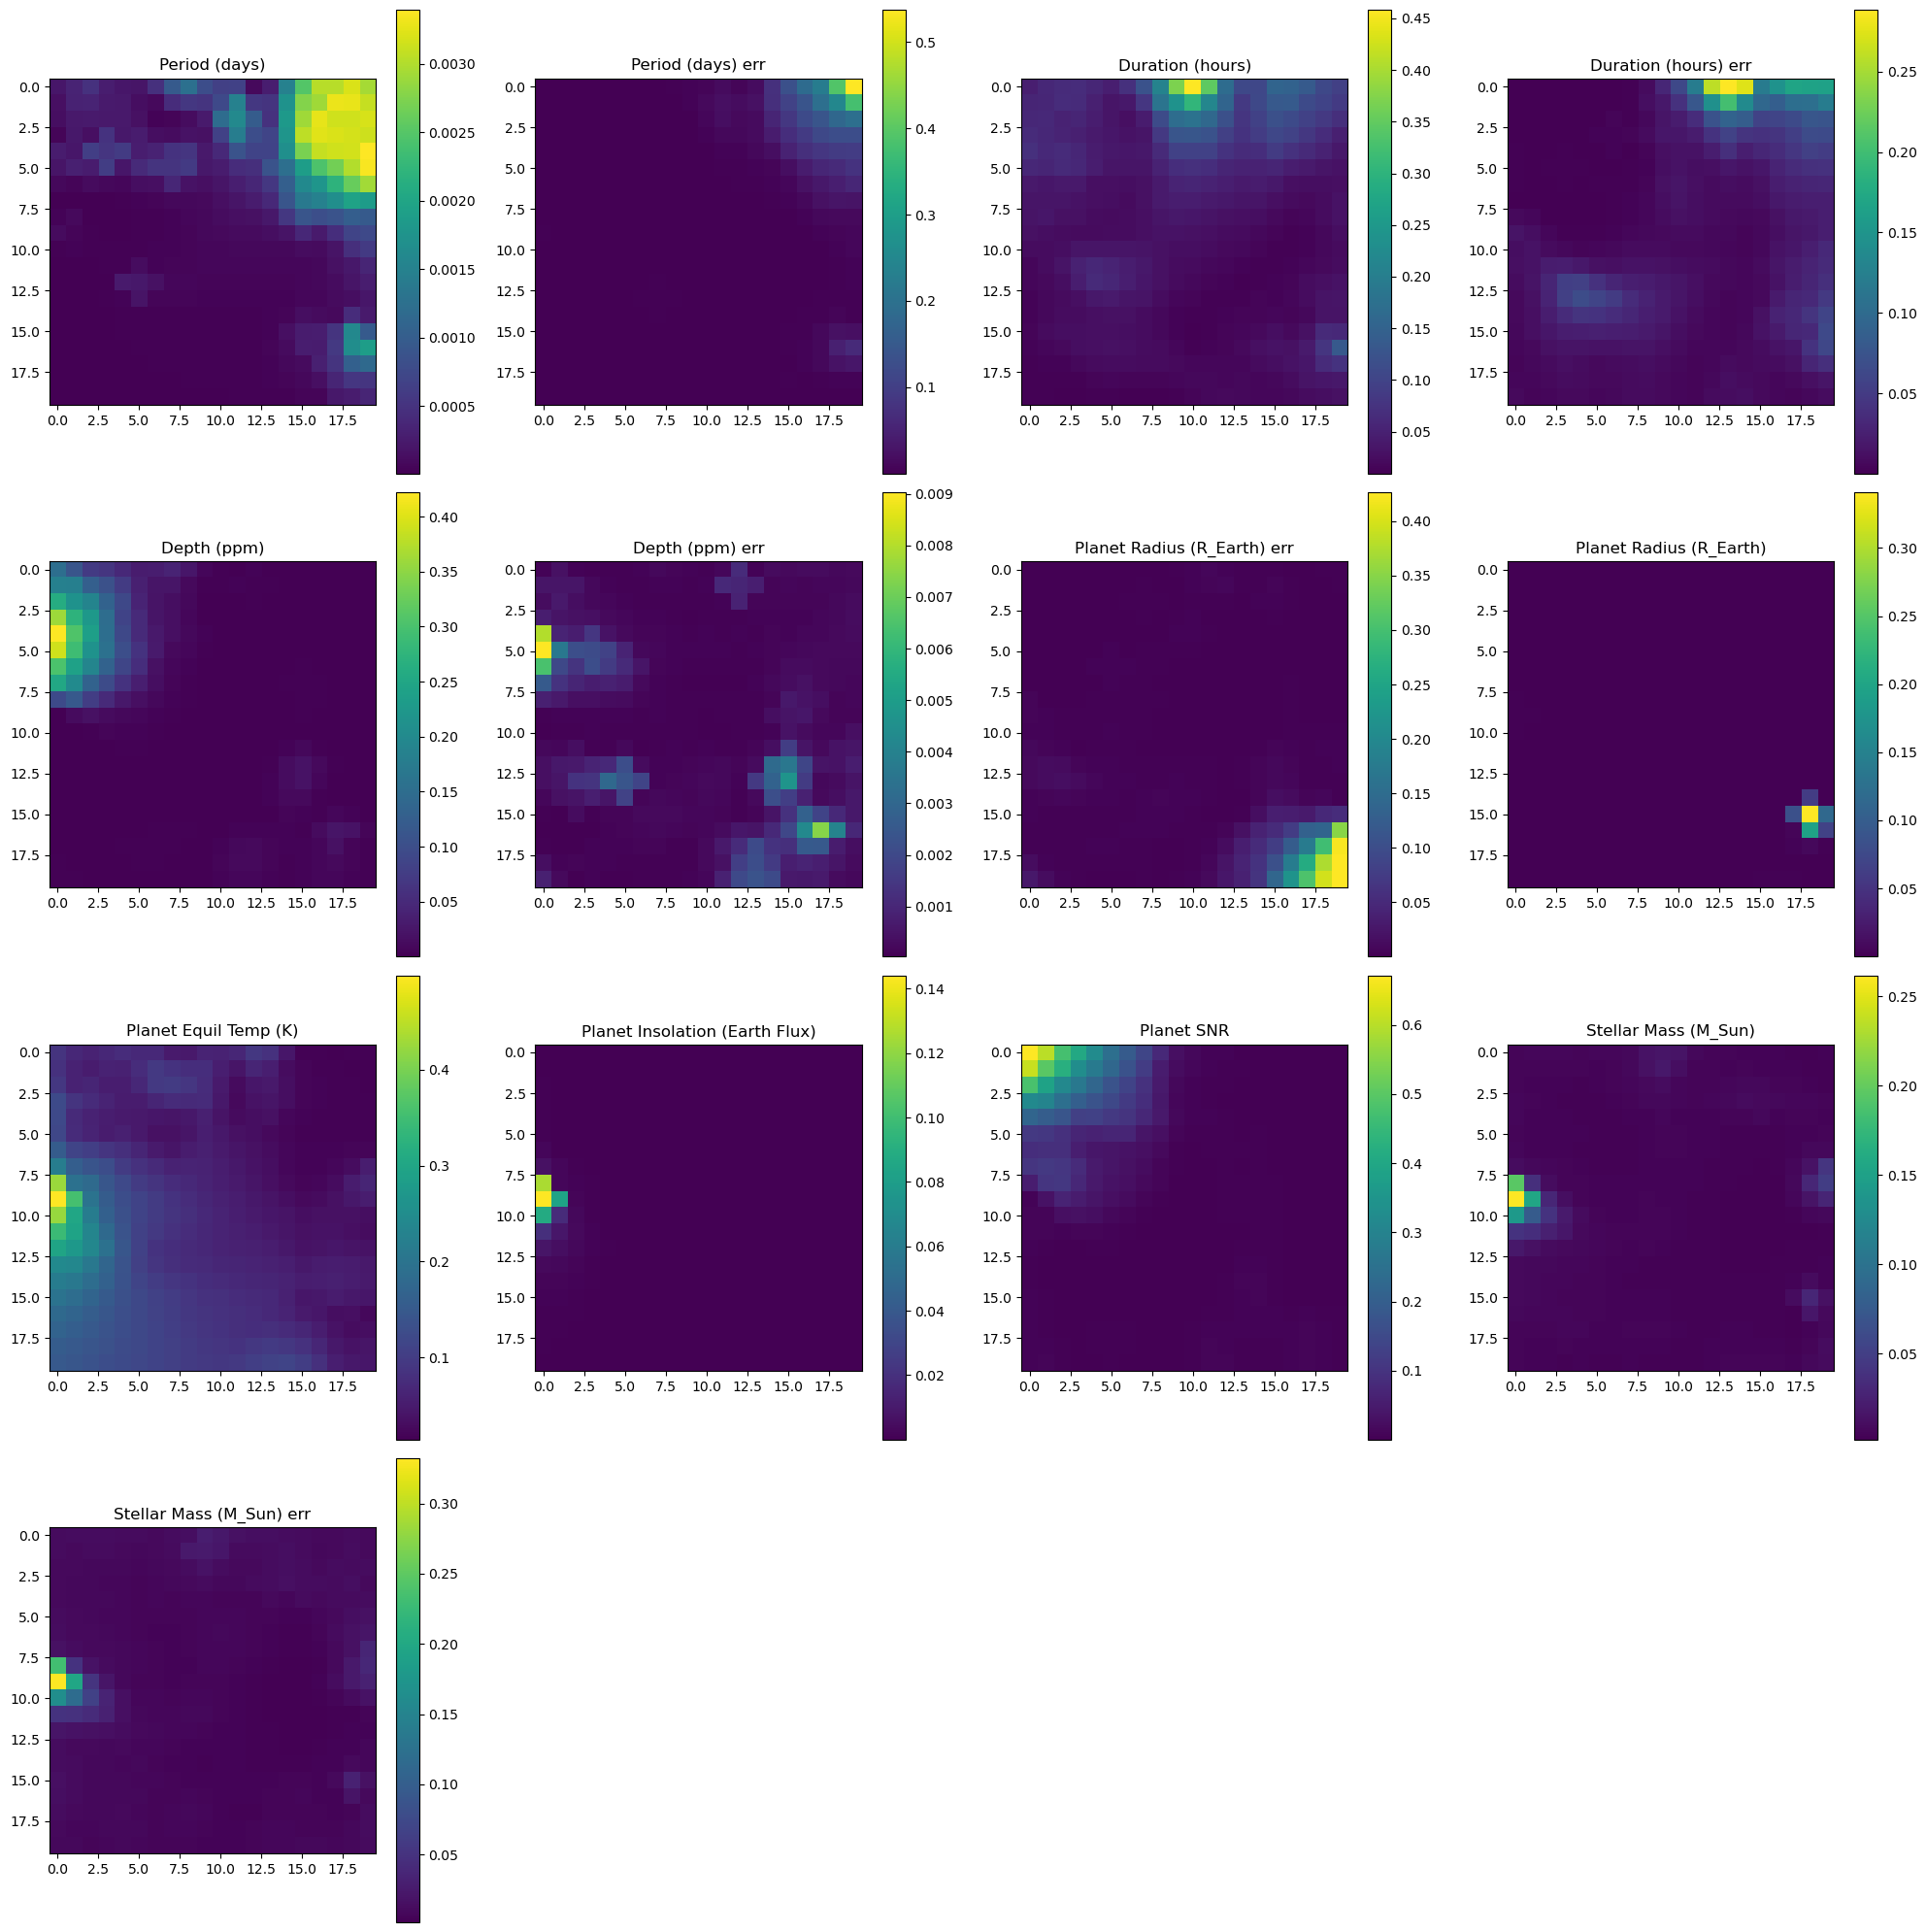

In [19]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [20]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(2, 0)  -> Planet:   0, False Planet:   8
(18, 2) -> Planet:   0, False Planet:  40
(9, 13) -> Planet:  49, False Planet:   0
(17, 11)-> Planet:  33, False Planet:   0
(9, 8)  -> Planet:   0, False Planet:  26
(0, 5)  -> Planet:   0, False Planet:  17
(2, 5)  -> Planet:   0, False Planet:  17
(10, 11)-> Planet:   0, False Planet:  40
(19, 6) -> Planet:  61, False Planet:   0
(9, 3)  -> Planet:   0, False Planet:  19
(0, 10) -> Planet:   0, False Planet:  13
(6, 12) -> Planet:  33, False Planet:   0
(8, 11) -> Planet:  42, False Planet:   0
(4, 6)  -> Planet:  22, False Planet:   0
(10, 5) -> Planet:  38, False Planet:   0
(3, 17) -> Planet:   0, False Planet:  21
(14, 19)-> Planet:  36, False Planet:   0
(19, 0) -> Planet:   0, False Planet:  33
(13, 5) -> Planet:   0, False Planet:  22
(11, 13)-> Planet:  40, False Planet:   0
(10, 9) -> Planet:  33, False Planet:   0
(18, 17)-> Planet:   0, False Planet:   9
(16, 10)-> Planet:  42, False Planet:   0
(14, 11)-> Planet:  31, False Plan

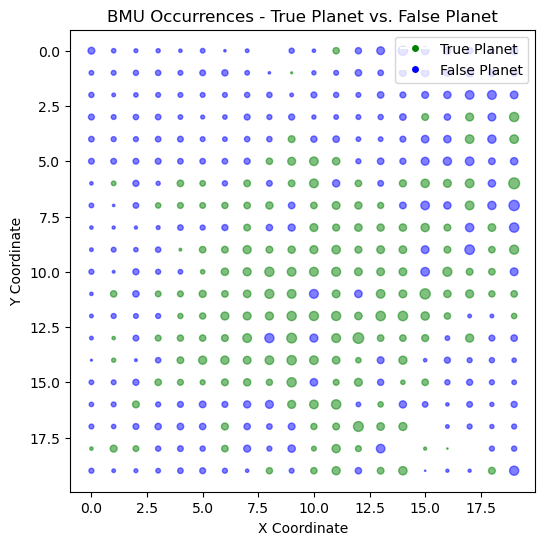

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [22]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

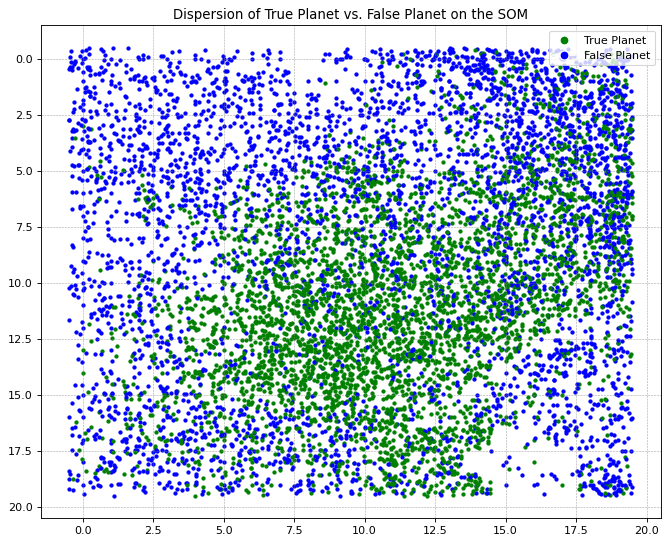

In [23]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

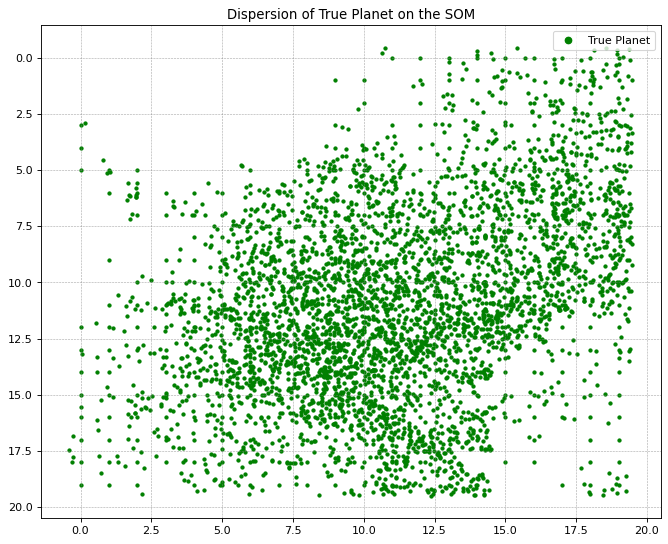

In [24]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

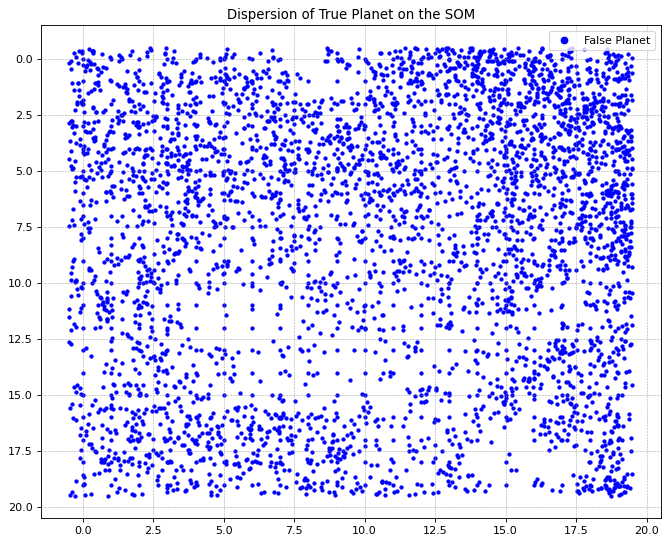

In [25]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

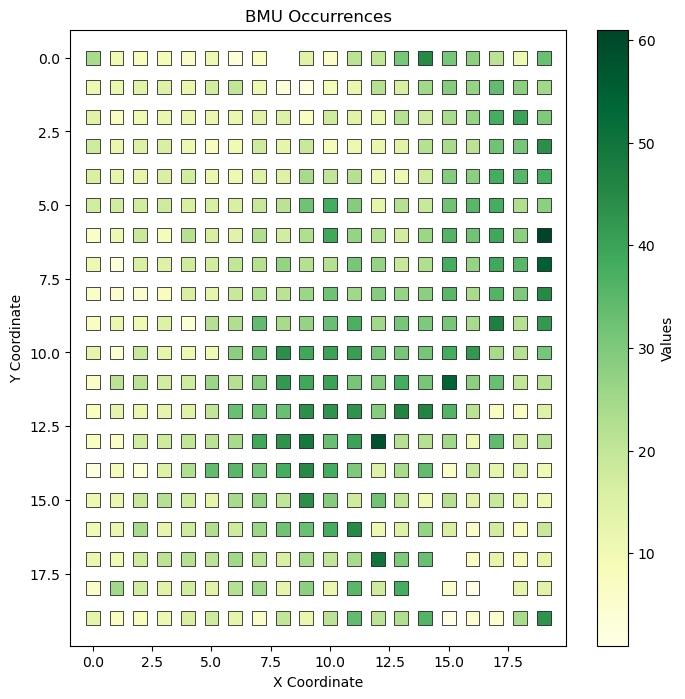

In [26]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

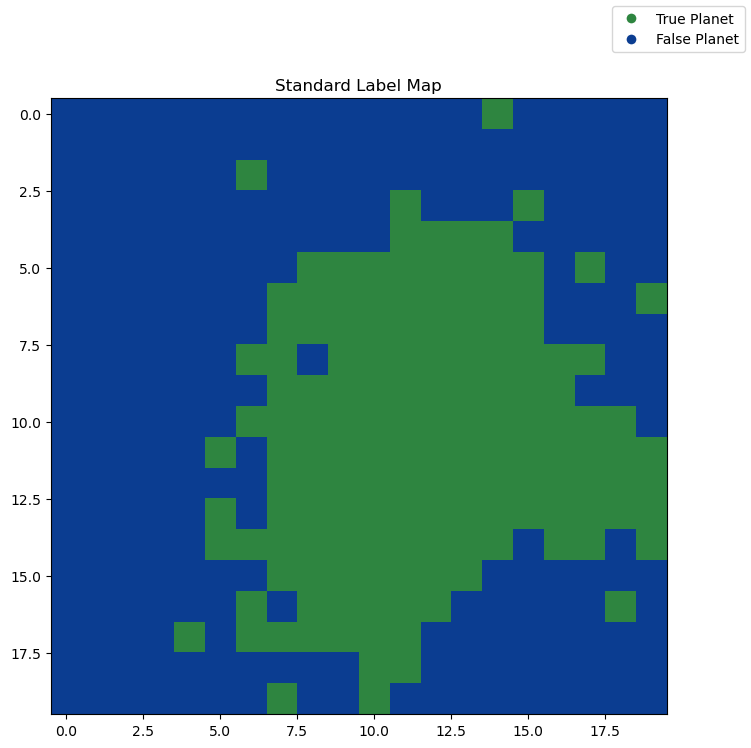

In [27]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

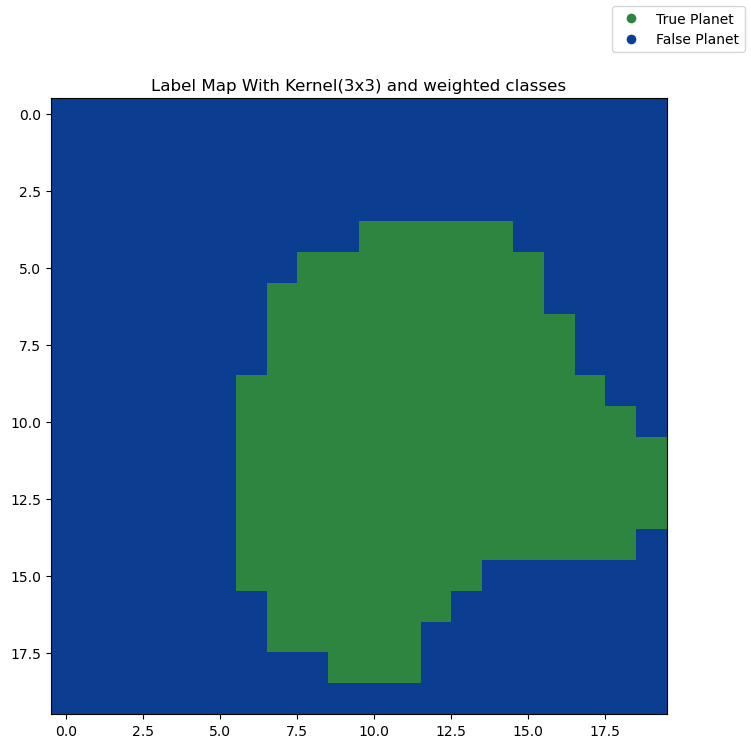

In [28]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

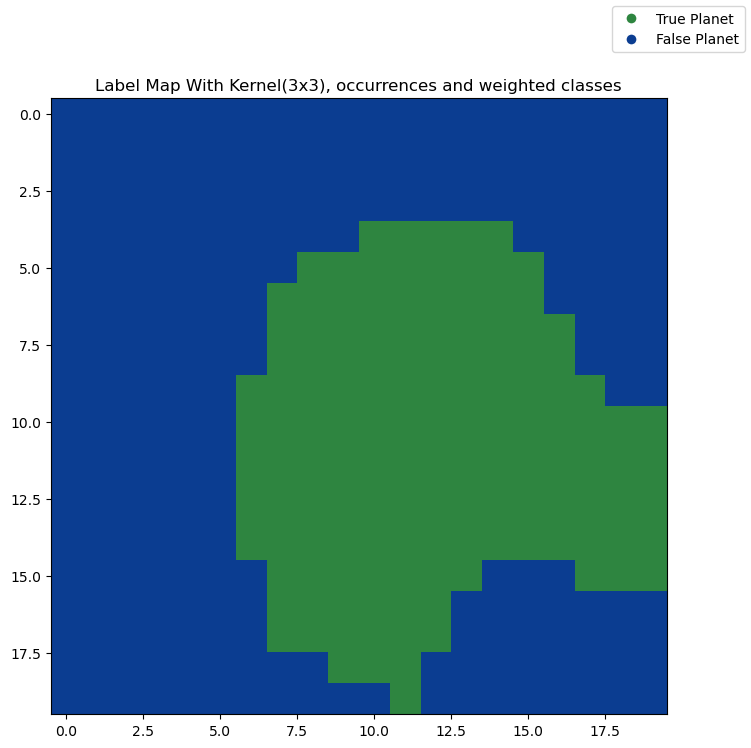

In [29]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7510411846367423
F1-score: 0.7523020257826889
Precision: 0.7366997294860235
Recall: 0.768579492003763
cm:  [[806 292]
 [246 817]]


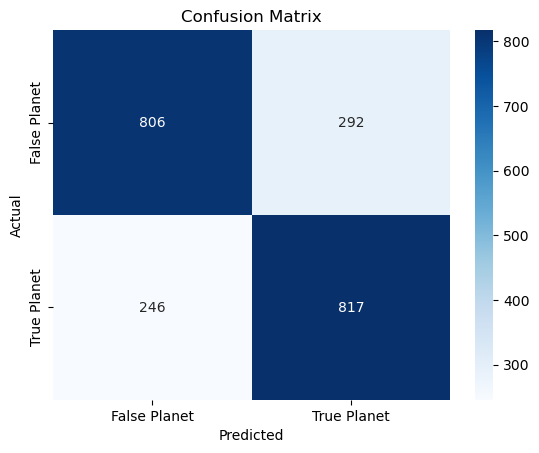

In [30]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7510411846367423
F1-score: 0.7504638218923934
Precision: 0.7401646843549863
Recall: 0.7610536218250236
cm:  [[814 284]
 [254 809]]


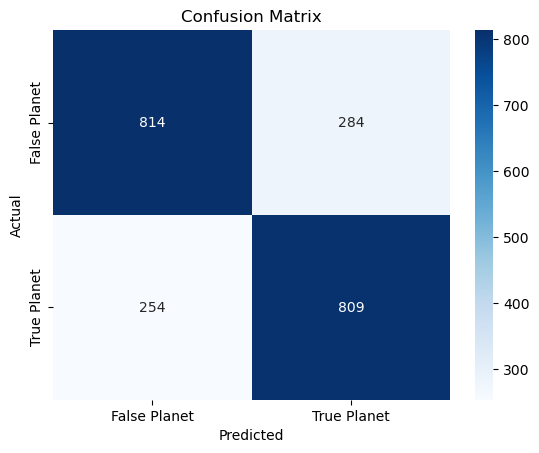

In [31]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7505784359093013
F1-score: 0.7508090614886732
Precision: 0.7381818181818182
Recall: 0.7638758231420508
cm:  [[810 288]
 [251 812]]


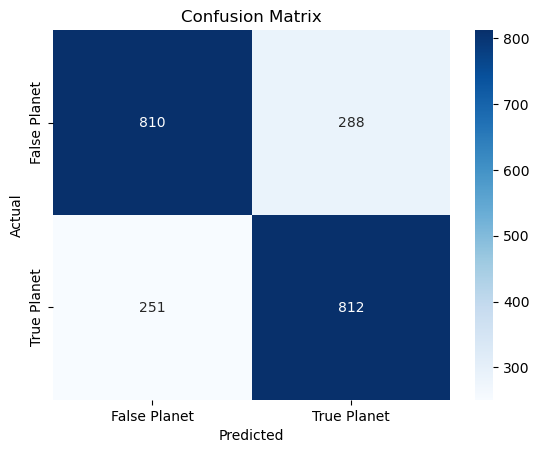

In [32]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7501156871818603
F1-score: 0.7504621072088724
Precision: 0.737511353315168
Recall: 0.7638758231420508
cm:  [[809 289]
 [251 812]]


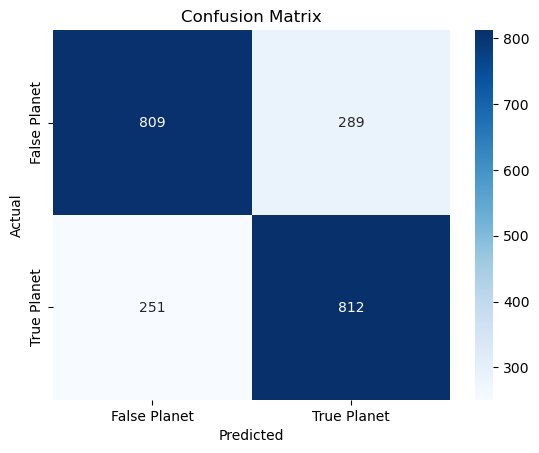

In [33]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)